### ADR

Analyze results

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from env.custom_hopper import *
import gym
from mujoco_py import GlfwContext
import glfw
from stable_baselines3 import SAC

In [20]:
adr_0_5 = SAC.load("AutoDR/SAC_steps_500000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto_u_0.5_threshold_1000_callback_freq_100_adaptation_rate_0.005/model.zip")

adr_1_0 = SAC.load("AutoDR/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto/model.zip")

udr_model = SAC.load("SAC-hyper-eval_callback/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto_u_0.5/best_model.zip")

In [21]:
source_env = gym.make('CustomHopper-source-v0')
target_env = gym.make('CustomHopper-target-v0')

n_episodes = 50
seed = 1234

In [22]:
def get_reward(env, model, n_episodes, seed, verbose = True):
    reward_list = np.array([])

    for i in range(n_episodes):
        done = False
        env.seed(seed + i)
        state = env.reset()
        total_reward = 0
        step_count = 0

        while not done:
            action, _ = model.predict(state, deterministic=True)

            state, reward, done, _ = env.step(action)
            total_reward += reward
            step_count += 1

        if verbose:
            print(f"Episode {i} reward: {total_reward} in total {step_count} steps")

        reward_list = np.append(reward_list, total_reward)

    return (reward_list)

In [23]:
udr_target_reward = get_reward(target_env, udr_model, n_episodes, seed)
udr_source_reward = get_reward(source_env, udr_model, n_episodes, seed)

Episode 0 reward: 956.9447044127425 in total 283 steps
Episode 1 reward: 918.0416942749065 in total 271 steps
Episode 2 reward: 1638.73619264856 in total 500 steps
Episode 3 reward: 1202.2297941629902 in total 331 steps
Episode 4 reward: 1676.6668164333707 in total 500 steps
Episode 5 reward: 1615.0877083646135 in total 500 steps
Episode 6 reward: 1639.0423982722953 in total 500 steps
Episode 7 reward: 1637.8598170520904 in total 500 steps
Episode 8 reward: 1212.6769797262746 in total 336 steps
Episode 9 reward: 1633.9301191469126 in total 500 steps
Episode 10 reward: 1241.8812659280584 in total 349 steps
Episode 11 reward: 1646.2403502394486 in total 500 steps
Episode 12 reward: 1640.2244473833714 in total 500 steps
Episode 13 reward: 1671.017432392924 in total 500 steps
Episode 14 reward: 1634.8374289978613 in total 500 steps
Episode 15 reward: 1004.6103567084069 in total 294 steps
Episode 16 reward: 955.8186619253296 in total 283 steps
Episode 17 reward: 1628.404451590341 in total 5

In [24]:
adr_0_5_source = get_reward(source_env, adr_0_5, n_episodes, seed)
adr_0_5_target = get_reward(target_env, adr_0_5, n_episodes, seed)

Episode 0 reward: 1423.5465247253958 in total 500 steps
Episode 1 reward: 1424.287968438798 in total 500 steps
Episode 2 reward: 1422.107799100926 in total 500 steps
Episode 3 reward: 1423.4258859215931 in total 500 steps
Episode 4 reward: 1419.2392172710615 in total 500 steps
Episode 5 reward: 1421.2428490179095 in total 500 steps
Episode 6 reward: 1422.6084836898722 in total 500 steps
Episode 7 reward: 1421.0002253699652 in total 500 steps
Episode 8 reward: 1422.6737533542287 in total 500 steps
Episode 9 reward: 1420.3779981179234 in total 500 steps
Episode 10 reward: 1421.7107825643575 in total 500 steps
Episode 11 reward: 1421.7437815516712 in total 500 steps
Episode 12 reward: 1421.9397021421544 in total 500 steps
Episode 13 reward: 1421.6668456594316 in total 500 steps
Episode 14 reward: 1420.4475309511658 in total 500 steps
Episode 15 reward: 1422.2004394982357 in total 500 steps
Episode 16 reward: 1420.9646111489349 in total 500 steps
Episode 17 reward: 1423.0311768643355 in to

In [25]:
adr_1_0_source = get_reward(source_env, adr_1_0, n_episodes, seed)
adr_1_0_target = get_reward(target_env, adr_1_0, n_episodes, seed)

Episode 0 reward: 1553.9824386824773 in total 500 steps
Episode 1 reward: 1552.1868675752023 in total 500 steps
Episode 2 reward: 1549.8440788255841 in total 500 steps
Episode 3 reward: 1549.6387780629511 in total 500 steps
Episode 4 reward: 1550.8552922192434 in total 500 steps
Episode 5 reward: 1549.127171149566 in total 500 steps
Episode 6 reward: 1551.0034500018419 in total 500 steps
Episode 7 reward: 1552.1248718887748 in total 500 steps
Episode 8 reward: 1551.537407394936 in total 500 steps
Episode 9 reward: 1548.3300378198394 in total 500 steps
Episode 10 reward: 1549.404622387679 in total 500 steps
Episode 11 reward: 1546.63369792232 in total 500 steps
Episode 12 reward: 1550.4030457539523 in total 500 steps
Episode 13 reward: 1549.6591030751551 in total 500 steps
Episode 14 reward: 1545.8625987619232 in total 500 steps
Episode 15 reward: 1551.4364698444085 in total 500 steps
Episode 16 reward: 1554.7652325899169 in total 500 steps
Episode 17 reward: 1549.605834353669 in total 

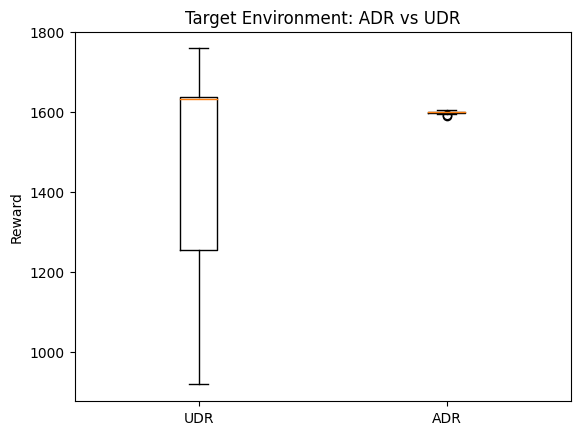

<Figure size 640x480 with 0 Axes>

In [28]:
# compare adr and udr
plt.figure()
plt.boxplot([udr_target_reward, adr_1_0_target], labels=['UDR', 'ADR'])
plt.title('Target Environment: ADR vs UDR')
plt.ylabel('Reward')
plt.show()

plt.savefig('ADR_vs_UDR.png')

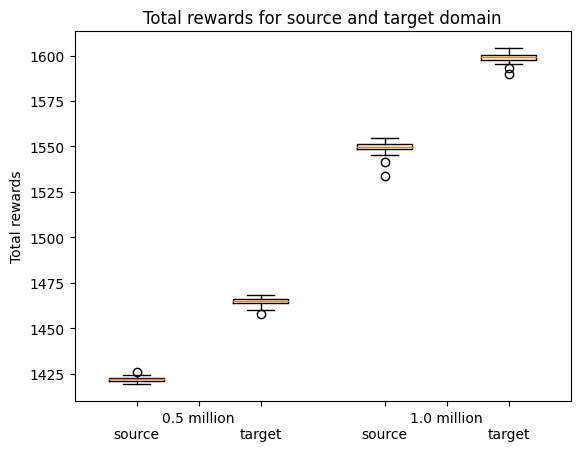

<Figure size 640x480 with 0 Axes>

In [29]:
# pliot boxplot of rewards

plt.boxplot([adr_0_5_source, adr_0_5_target, adr_1_0_source, adr_1_0_target], positions=[1, 2, 3, 4])

plt.xticks([1, 1.5, 2, 3, 3.5, 4], ['\nsource', '0.5 million', '\ntarget', '\nsource', '1.0 million', '\ntarget'])
# set y limits
# plt.ylim(1200, 1800)

plt.ylabel('Total rewards')
plt.title('Total rewards for source and target domain')
plt.show()
plt.savefig('ADR.png')
